# Dev for lecture 22

In [1]:
## Import packages

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

# Set size of font for matplotplib
plt.rc('font', size=12) 

print("Done importing packages :)")

Done importing packages :)


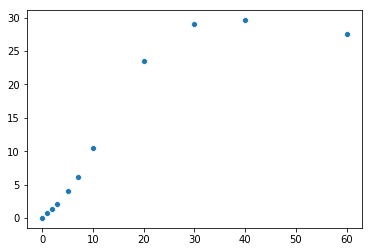

In [2]:
# ATCase data

asp = np.array([0, 1, 2, 3, 5, 7, 10, 20, 30, 40, 60])
# specific_activity = np.array([0, 1.93642, 3.616, 4.8907, 6.67802, 7.86218, 8.87624, 11.0553, 11.843325, 12.42858, 13.45055])
specific_activity = np.array([0, 0.6814, 1.2617, 2.07858, 4.05992, 6.1683, 10.44972, 23.56204, 28.99312, 29.62764, 27.60816])
# sa_3 = np.array([0, 5.55004, 11.01986, 15.22968, 22.69824, 27.44544, 31.75422, 34.76012, 32.25596, 29.78312, 26.23714])
sns.scatterplot(asp, specific_activity)


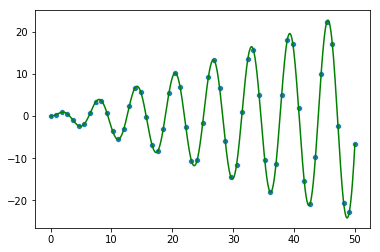

In [3]:
## Smoothing

x = np.linspace(0,50,55)
y = 0.5*x*np.sin(x)
more_x = np.linspace(0,50,1000)


interpolated_function_y = interp1d(x, y, kind='cubic')

sns.scatterplot(x,y)
sns.lineplot(more_x,interpolated_function_y(more_x), color="green")



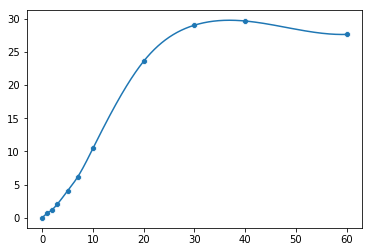

In [4]:
# Fit smoothed interpolation

from scipy.interpolate import interp1d

interpolated_function = interp1d(asp, specific_activity, kind='cubic')
sns.scatterplot(asp, specific_activity)
sns.lineplot(np.linspace(0,60,1000),interpolated_function(np.linspace(0,60,1000)))

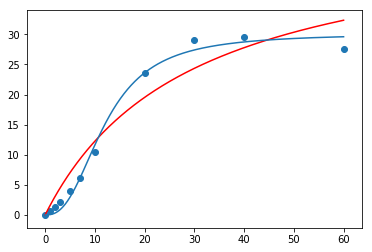

In [5]:
# Define MM function
# Define hill sa function also write in markdowna

def MM_func(x,v_max, k_m):
    return (x*v_max)/(k_m + x)

def Hill_func(x,v_max, n, k_d):
    return (v_max*x**n)/(k_d**n + x**n)

popt_mm, pcov_mm = curve_fit(MM_func, asp, specific_activity)
popt_hill, pcov_hill = curve_fit(Hill_func, asp, specific_activity, p0 = [30, 5, 15], bounds=(1, [50, 5, 20]))

more_asp = np.linspace(0,60,1000)
interpolate_specific_activity = interp1d(asp, specific_activity, kind='cubic')

plt.plot(more_asp, MM_func(more_asp, *popt_mm), 'r-', label='fit: v_max=%5.3f, k_m=%5.3f' % tuple(popt_mm))
plt.plot(more_asp,Hill_func(more_asp, *popt_hill))
plt.scatter(asp, specific_activity)

In [6]:
popt_hill

array([30.10739334,  2.532121  , 12.01136522])

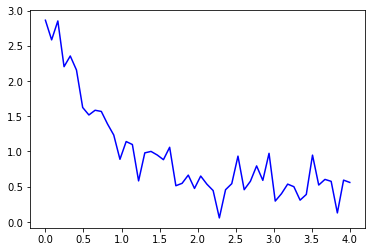

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

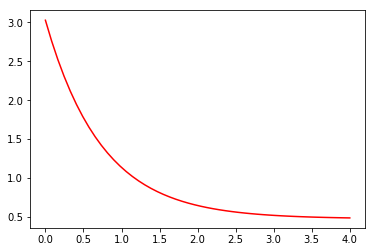

In [8]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [9]:
popt

array([2.55423706, 1.35190947, 0.47450618])

In [10]:
pcov

array([[ 0.0158905 ,  0.00681778, -0.0007614 ],
       [ 0.00681778,  0.02019919,  0.00541905],
       [-0.0007614 ,  0.00541905,  0.00282595]])

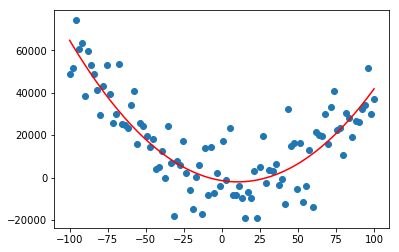

In [11]:
## Quadratic example

# Use x from before
x_quad = np.linspace(-100,100,100)
y_quad = 5*(x_quad-10)**2

# add noise
y_quad_noise = y_quad + 10000 * np.random.normal(size=x_quad.size)
plt.scatter(x_quad,y_quad_noise)

# define quadratic fit a + b*(x-c)**2
def quad_func(x,a,b,c):
    return a + b*(x-c)**2

popt_quad, pcov_quad = curve_fit(quad_func, x_quad, y_quad_noise)
plt.plot(x_quad, quad_func(x_quad, *popt_quad), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_quad))


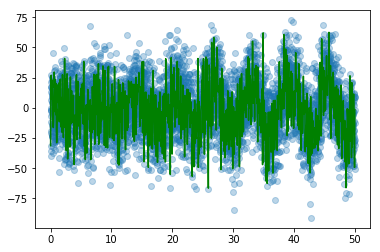

In [12]:
#### Smoothing

## Smoothing

x = np.linspace(0,50,5500)
y = 0.5*x*np.sin(x) + 20 * np.random.normal(size=x.size)
more_x = np.linspace(0,50,1000)


interpolated_function_y = interp1d(x, y, kind='cubic')

plt.scatter(x,y, alpha = 0.3)
sns.lineplot(more_x,interpolated_function_y(more_x), color="green")


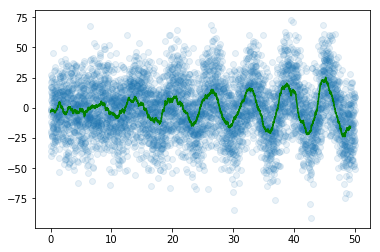

In [13]:
## Or smoothing with sliding window
# Working on the assumption that i sampled at regularly spaced intervals

window_size = 80

smoothed_y = np.array([])

for i in np.arange(y.size-window_size):

    y_window_mean = np.mean(y[i:i+window_size])
    smoothed_y = np.append(smoothed_y,[y_window_mean])
#     print(y_window_mean)
    
plt.scatter(x,y, alpha = 0.1)
sns.lineplot(x[:-window_size],smoothed_y, color="green")



### Table of fake data

Data table | X=0| X=1 | X=2 | X=3 | X=4 | X=5 | X=6 | X=7 | X=8 | X=9
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Yes Y=1 | 0 | 0 | 0 | 1 | 0 | 1 | 1 | 0 | 1 | 1 
No Y=0 | 1 | 1 | 1 | 0 | 1 | 0 | 0 | 1 | 0 | 0

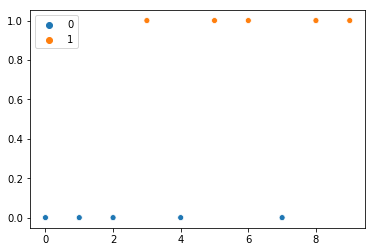

In [14]:
## Logistic regression

lg_x = np.arange(10)
lg_y = [0, 0, 0, 1, 0, 1, 1, 0, 1, 1]


sns.scatterplot(lg_x, lg_y, hue = lg_y)


### Slightly different data

Data table | X=0| X=1 | X=2 | X=3 | X=4 | X=5 | X=6 | X=7 | X=8 | X=9
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Yes Y=1 | 0 | 2 | 6 | 3 | 9 | 11 | 20 | 22 | 23 | 21 
No Y=0 | 25 | 23 | 19 | 22 | 16 | 14 | 5 | 3 | 2 | 4

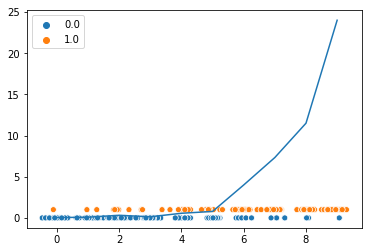

In [15]:
# Make a vector of the above and plot

x_vals = np.arange(10)
yes_counts = np.array([1, 2, 6, 3, 9, 11, 20, 22, 23, 24])
no_counts = np.array([24, 23, 19, 22, 16, 14, 5, 3, 2, 1])

# Need to create vector of above or this will be really annoying
x_vals_exp = np.array([])
data_vec = np.array([])
for x_i in x_vals:
    
    # I know there are 25 records for each x value
    x_vals_exp = np.append(x_vals_exp, x_i * np.ones(25))
    
    additional_yes = np.ones(yes_counts[x_i])
    additional_nos = np.zeros(no_counts[x_i])
    data_vec = np.append(data_vec, additional_yes)
    data_vec = np.append(data_vec, additional_nos)
    
    
y_odds = yes_counts/((25-yes_counts))
sns.scatterplot(x_vals_exp + 0.2*np.random.normal(size=x_vals_exp.size), data_vec, hue = data_vec)
# sns.lineplot(x_vals, np.log(y_odds))
sns.lineplot(x_vals, y_odds)

Text(0.5, 1.0, 'y=[-3.26539345] + [0.7126894]')

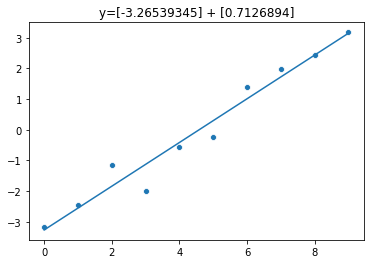

In [16]:
sns.scatterplot(x_vals, np.log(y_odds))

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_vals.reshape(-1,1), np.log(y_odds).reshape(-1,1))
a_logit = regr.intercept_
b_logit = regr.coef_[0]

sns.lineplot(x_vals, a_logit + b_logit*x_vals)
plt.title(f'y={regr.intercept_} + {regr.coef_[0]}')

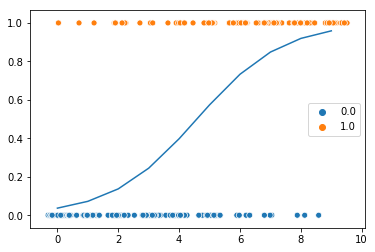

In [17]:
lo_yhats = a_logit + b_logit*x_vals
y_hats = np.exp(lo_yhats)/(1 + np.exp(lo_yhats))

sns.lineplot(x_vals, y_hats)
sns.scatterplot(x_vals_exp + 0.2*np.random.normal(size=x_vals_exp.size), data_vec, hue = data_vec)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0.63164626]] [-2.87336135]
Accuracy = 0.816


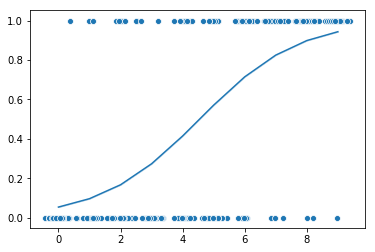

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(x_vals_exp.reshape(-1,1), data_vec.reshape(-1,1))
model
print(model.coef_, model.intercept_)
model.predict_proba(x_vals_exp.reshape(-1,1))[:,1]
sns.scatterplot(x_vals_exp +0.2*np.random.normal(size=x_vals_exp.size),data_vec)
sns.lineplot(x_vals_exp, model.predict_proba(x_vals_exp.reshape(-1,1))[:,1])

print(f'Accuracy = {model.score(x_vals_exp.reshape(-1,1), data_vec)}')

nnoooowww can do odds stuff


In [19]:
additional_nos

array([0.])

In [20]:
## Try to fit a straight line... it's bad

$$ log-odds(Y) = ln[Y/(1-Y)] =  \alpha + \beta X$$

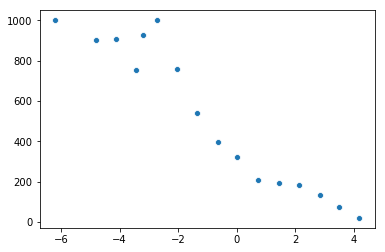

In [21]:
# Load in depmap data
# PFEIFFER non-hodgkin lymphoma

deb_response = 1000 * np.array([1.03, 0.925, 0.904, 0.906, 0.755, 1.09, 0.758, 0.540, 0.395, 0.321, 0.207, 0.194, 0.185, 0.136, 0.0749, 0.0200])

# Artificially thresholding
deb_response[deb_response >1000] = 1000

# Concentration of debrafenib in micromoles
concentration =  np.log(np.array([0.002, 0.041, 0.0081, 0.016, 0.032, 0.065, 0.13, 0.26, 0.52, 1.0, 2.1, 4.2, 8.3, 17., 33., 66.]))

sns.scatterplot(concentration, deb_response)


In [22]:
data = pd.read_excel("data/student_data.xlsx")
data

,Timestamp,Did you have caffeine today?,Time how long you can keep your eyes open (without blinking). Report your time in seconds. Please do not add units.,Time how long you can balance on one foot. Report your time in seconds. Please do not add units.
0,2020-04-14 10:02:56.696,No,16.00,80.00
1,2020-04-14 10:10:38.502,Yes,58.67,304.00
2,2020-04-14 10:26:37.815,No,10.00,374.00
3,2020-04-14 10:28:56.550,No,89.00,72.00
4,2020-04-14 10:39:47.754,Yes,15.00,360.00
5,2020-04-14 10:44:29.349,No,8.00,103.00
6,2020-04-14 10:50:35.527,No,37.00,285.00
7,2020-04-14 10:52:01.734,No,21.02,31.75
8,2020-04-14 10:52:52.056,Yes,220.00,301.00
9,2020-04-14 11:04:03.337,No,56.00,150.00


In [23]:
caffeine_yn = np.array(data["Did you have caffeine today?"])
caffeine_yn

array(['No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes'], dtype=object)

In [24]:
eyes_time = np.array(data["Time how long you can keep your eyes open (without blinking). Report your time in seconds. Please do not add units."])
eyes_time

array([ 16.  ,  58.67,  10.  ,  89.  ,  15.  ,   8.  ,  37.  ,  21.02,
       220.  ,  56.  ,  99.  ,  20.  ,  11.  ,  17.  ,  22.  ,  11.25,
        14.  , 103.66, 103.  ,  21.  ,  19.  , 285.  ,  75.  ,   6.  ,
        98.  ,  26.  ,  12.1 ,  25.  ,  17.2 ,  30.  ,  96.  ,  74.  ,
        75.  ,  15.  ,  15.  ,  11.  ,  65.  ,   9.  ,  16.3 ,  30.  ,
        11.  ,  34.  ,  32.81,  19.  ,  67.  ,  42.  ,  13.  ,  31.  ,
        99.  ,  34.  ,   8.  ,   5.  ,  50.  ,  30.  ])

In [25]:
one_leg = np.array(data["Time how long you can balance on one foot. Report your time in seconds. Please do not add units."])
one_leg

array([  80.  ,  304.  ,  374.  ,   72.  ,  360.  ,  103.  ,  285.  ,
         31.75,  301.  ,  150.  ,  316.  ,   60.  ,   37.  ,   45.  ,
        144.  ,  113.94,  120.  ,   73.57,   42.  ,  120.  ,  264.  ,
        213.  ,   59.  ,  302.  ,  218.  ,   82.  ,   90.  ,  186.  ,
        317.6 ,  257.  ,  281.  ,   56.  ,   33.  , 9535.  ,  270.  ,
         35.  ,  130.  ,   62.  ,  209.  ,   60.  ,  109.  ,  600.  ,
        360.  ,  672.  ,   56.  ,   22.  ,   76.  ,  240.  ,   65.  ,
         88.  ,   45.  ,  191.  ,   60.  ,  180.  ])